<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Alanave28/blob/main/A00989308_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y Analítica de Datos**

##**Profesor Titular:** Dra. María de la Paz Rico Fernández
##**Profesor Tutor:** Roberto Antonio Guevara González

###**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

##**Alumno:** Alan Avelino Fernández Juárez

##**Matrícula:** A00989308


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [66]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# Cálculo de eigendescomposición
val1, vect1 = eig(A1)
print(val1) #D
print(vect1) #W

#Reconstrucción
val1, vect1 = np.linalg.eig(A1)

W1 = vect1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(val1)

print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
B1= np.round(np.dot(np.dot(W1,D1), Winv1), decimals=0)
print(B1.real)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [67]:
#Matriz 2
A2 = array([[5, 4, 0], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# Cálculo de eigendescomposición
val2, vect2 = eig(A2)
print(val2) #D
print(vect2) #W

#Reconstrucción
val2, vect2 = np.linalg.eig(A2)

W2 = vect2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(val2)

print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
B2= np.round(np.dot(np.dot(W2,D2), Winv2), decimals=0)
print(B2.real)
print("-----------------------------")

-------Matriz original-------
[[5 4 0]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 6.27491722 -1.27491722  1.        ]
[[ 0.95277495 -0.53753252  0.        ]
 [ 0.3036773   0.84324302  0.        ]
 [ 0.          0.          1.        ]]
-------Matriz reconstruida-------
[[ 5.  4.  0.]
 [ 2. -0.  0.]
 [ 0.  0.  1.]]
-----------------------------


In [69]:
#Matriz 3
A3 = array([[1, 3, 8], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# Cálculo de eigendescomposición
val3, vect3 = eig(A3)
print(val3) #D
print(vect3) #W

#Reconstrucción
val3, vect3 = np.linalg.eig(A3)

W3 = vect3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(val3)

print("-------Matriz reconstruida-------")
# Reconstruccion de B=W*D*Winv
B3= np.round(np.dot(np.dot(W3,D3), Winv3), decimals=0)
print(B3.real)
print("-----------------------------")

-------Matriz original-------
[[ 1  3  8]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[10.84912057 -7.97019953 -0.87892104]
[[-0.64858112 -0.66358065  0.54094933]
 [-0.1289255  -0.0105956  -0.82135724]
 [-0.75014715  0.74802971  0.18095883]]
-------Matriz reconstruida-------
[[ 1.  3.  8.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


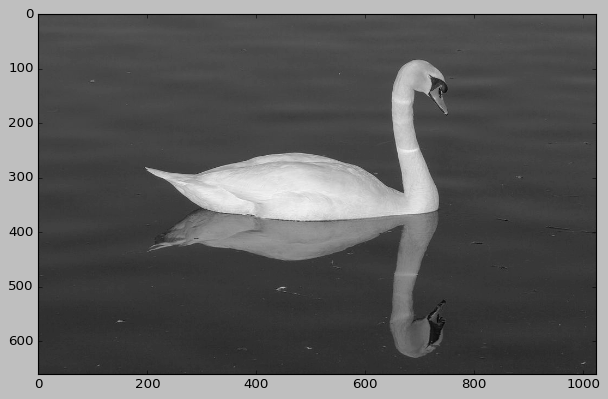

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FABD720E590>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [41]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

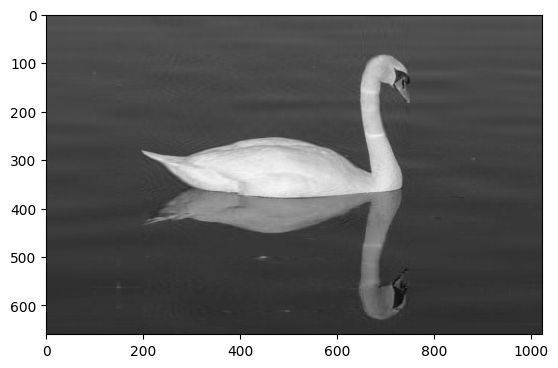

Felicidades la imagen está comprimida


In [43]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[11. 11. 12. ... 39. 52. 58.]


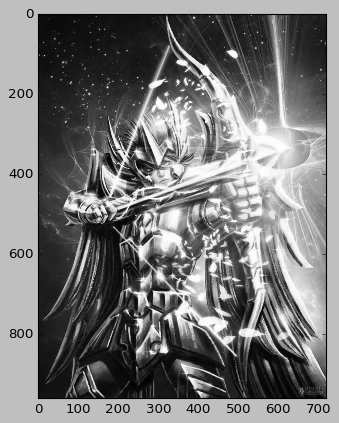

<PIL.Image.Image image mode=LA size=720x960 at 0x7FABD359A490>


In [10]:
#imagen 1
sag = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/b4/83/50/b483501beaa013788e5c103d259a9ca5.jpg')).convert('LA')
sagGray = sag.convert('LA')
sagMat = np.array(list(sagGray.getdata(band=0)),float)

print(sagMat)

sagMat.shape = (sagGray.size[1],sagGray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(sagMat,cmap='gray')
plt.show()
print(sag)

In [11]:
U1,D1,V1 = np.linalg.svd(sagMat)
sagMat.shape

(960, 720)

In [12]:
U1.shape

(960, 960)

In [13]:
V1.shape

(720, 720)

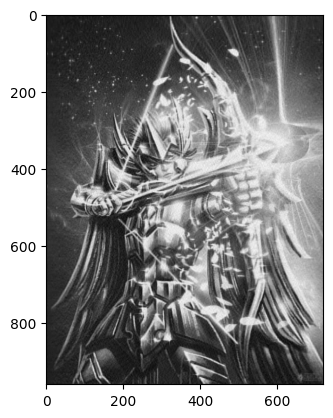

Felicidades la imagen está comprimida


In [55]:
nvalue = 120
#------------------------------
reconstSag = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])
plt.imshow(reconstSag,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[21. 21. 20. ... 19. 19. 19.]


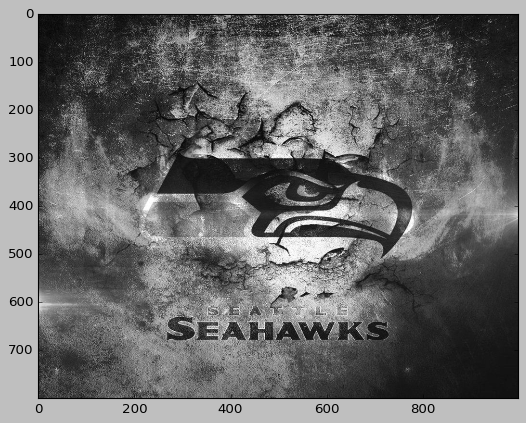

<PIL.Image.Image image mode=LA size=999x799 at 0x7FABD7216710>


In [15]:
#imagen 2
seattle = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/a6/cb/0c/a6cb0c3780f8b75ac27e0bcf58d1d3ad.jpg')).convert('LA')
seattleGray = seattle.convert('LA')
seattleMat = np.array(list(seattleGray.getdata(band=0)),float)

print(seattleMat)

seattleMat.shape = (seattleGray.size[1],seattleGray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(seattleMat,cmap='gray')
plt.show()
print(seattle)

In [16]:
U2,D2,V2 = np.linalg.svd(seattleMat)
seattleMat.shape

(799, 999)

In [17]:
U2.shape

(799, 799)

In [18]:
V2.shape

(999, 999)

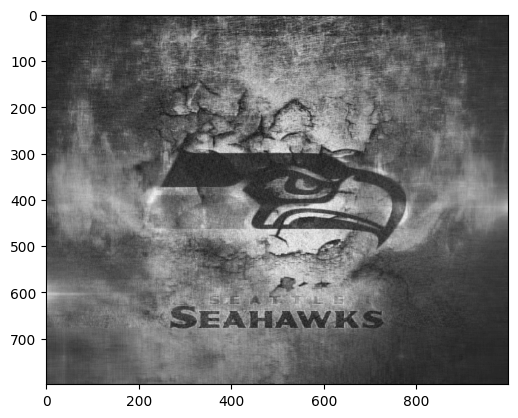

Felicidades la imagen está comprimida


In [60]:
nvalue = 80
#------------------------------
reconstSeattle = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
plt.imshow(reconstSeattle,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[75. 73. 72. ... 34. 39. 44.]


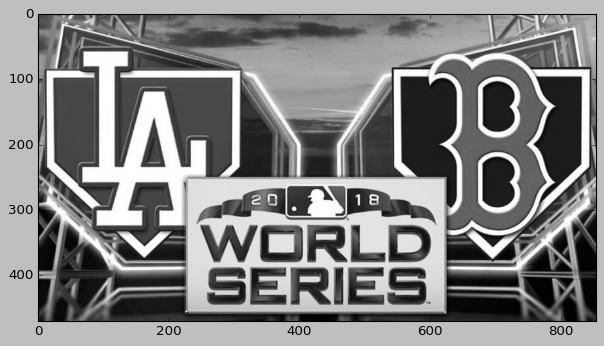

<PIL.Image.Image image mode=LA size=855x470 at 0x7FABD4B3E990>


In [20]:
#imagen 3
rsVSla = Image.open(urllib.request.urlopen('https://i0.wp.com/reydelparlay.com/wp-content/uploads/2018/10/rich-hill-vs-drew-pomeranz-world-series_apuestas.png?fit=855%2C470&ssl=1')).convert('LA')
rsVSlaGray = rsVSla.convert('LA')
rsVSlaMat = np.array(list(rsVSlaGray.getdata(band=0)),float)

print(rsVSlaMat)

rsVSlaMat.shape = (rsVSlaGray.size[1],rsVSlaGray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(rsVSlaMat,cmap='gray')
plt.show()
print(rsVSla)

In [21]:
U3,D3,V3 = np.linalg.svd(rsVSlaMat)
rsVSlaMat.shape

(470, 855)

In [22]:
U3.shape

(470, 470)

In [23]:
V3.shape

(855, 855)

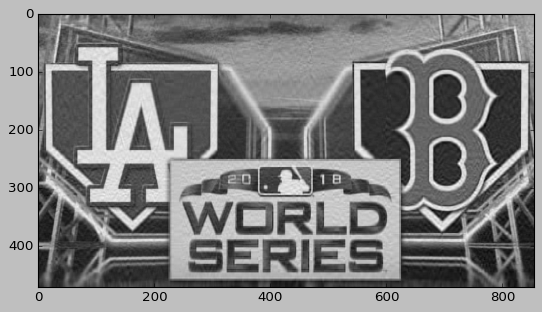

Felicidades la imagen está comprimida


In [24]:
nvalue = 60
#------------------------------
reconstRSvsLA = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
plt.imshow(reconstRSvsLA,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




####**Ejemplo de Python usando scikit-learn y el conjunto de datos de Iris**

In [26]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA 
import pandas as pd
from sklearn.preprocessing import StandardScaler


plt.style.use('ggplot')
# Cargar los datos 
iris = datasets.load_iris() 
X = iris.data 
y = iris.target
# Puntuación Z de las características 
scaler = StandardScaler() 
scaler.fit(X) 
X = scaler.transform(X)
# El modelo PCA 
pca = PCA(n_components=2) # estimar solo 2 PC 
X_new = pca.fit_transform(X) # proyectar los datos originales en el espacio PCA

Graficamos los datos antes y después de la transformación PCA y también codificamos con colores cada punto (muestra) usando la class of the flower correspondiente (y).

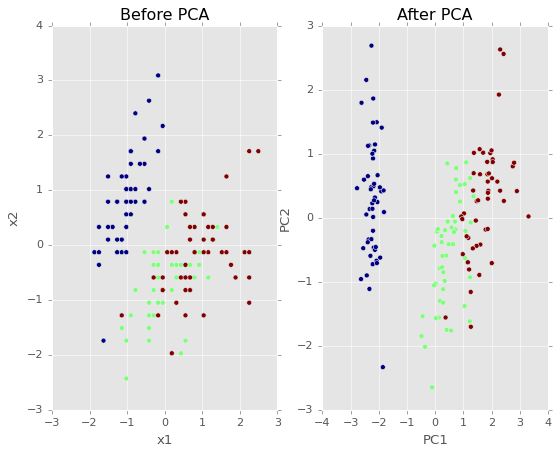

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [29]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


Visualizamos que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (73 % de la varianza) y PC2 (22 % de la varianza). Juntos, explican el 95%.

####**Prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido**

In [63]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [64]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

####**Feature importance**

Se refleja en la magnitud de los valores correspondiente a los vectores. Mayor magnitud, mayor importancia.

In [35]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Concluimos que para PC1 las features más importantes son la función 1, 3 y 4, mientras que para PC2 la más importante es la función 2.

####**The biplot**

La mejor manera de visualizar resultados después de un PCA.

In [62]:
#Implementación estándar con Pyhton
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

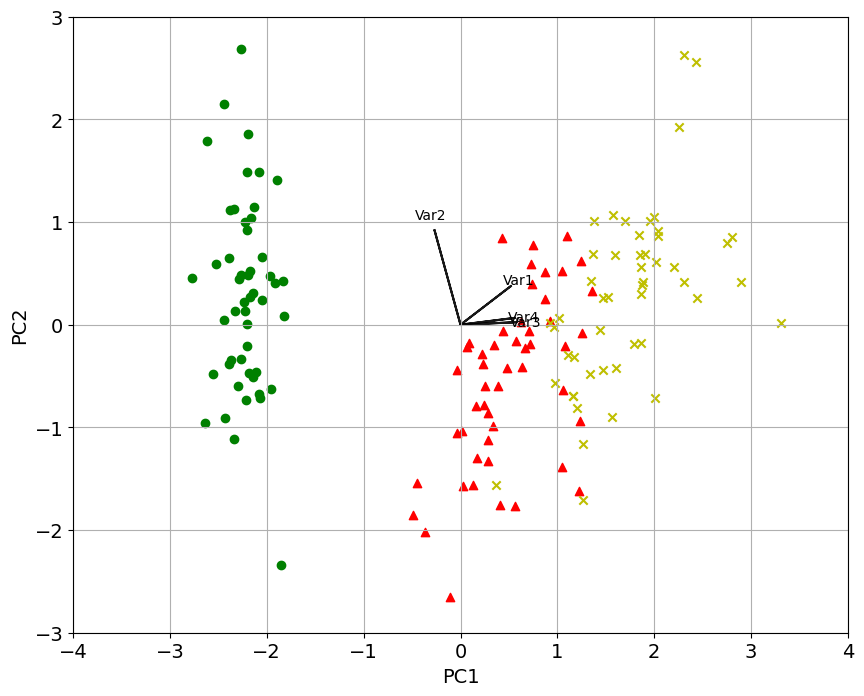

In [37]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Las Variables que apuntan hacia el mismo lado indican correlación, en este caso sería Var3 y Var4 con una ligera correlación con Var1; mientras que con Var2 que reflejan contraste.

In [39]:
# Var 3 and Var 4 presentan una extrema correlación
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [40]:
# Var 2and Var 3 están correlacionadas negativamente.
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [25]:
#Lo más relevante del ejercicio fue visulizar el impacto que tiene PCA sobre un dataset 
    #y la correlación que existe entre sus features importance. 
#Visualizar a más detalle el proceso del PCA y principalmente visualizar de forma gráfica los resultados de este.

###CONCLUCIONES
####**¿Qué es feature importance y para que nos sirve?**

Las feature importance son las variables resultantes del PCA que nos permiten conocer más a detalle nuestro conjunto de datos y que nos reflejan la magnitud de estos valores con respecto al vector. Estas variables, de igual manera, son utilizadas para identificar las features de nuestro dataset que más contribuyen a pedecir la variable objetivo.


####**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Los hallazgos más relevantes del ejercicio es la correlación entre features importance con resecto a cada uno de los PCA's generados. Es importante poder contar con una visualización gráfica de lo mencionado anteriormente, esto con el fin de identificar las variables o funciones y observar porque son importantes para cada PCA.


####**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
Actualmente en donde trabajo tenemos un plataforma donde se lleva un control y registro de documentos para alrededor de 1800 proveedores de empresas en cuestión de servicios especializados. Este control consta de 16 documentos que se llevan un proceso de validación de información con un robot. Este ejercicio me sería de mucha utilidad  para obtener ciertos datos estadísticos y esto tomarlo en como base para reforzar el entendimiento de los proveedores. 

Por ejemplo, así lograríamos identificar qué documentos son en los que prsentan mayor rango de error al momento de la validación de estos y si presentan alguna correlación con otros documentos que, de igual manera, reflejen en su validación que es un documento erróneo o de fecha que no corresponde. Así mismo podría identificar el error más comun de los documentos y con esto en las reuniones enfocar más esfuerzos en que este punto quede más claro.